<a href="https://colab.research.google.com/github/Vlxn761/redshift-fotometrico/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Montaje

In [1]:
pip install mpl-scatter-density

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.5/749.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import train_test_split
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
path_archivo ='/content/drive/MyDrive/Tareas Módulo/Proyecto redshift fotométrico/Redshift.csv'
data = pd.read_csv(path_archivo, skiprows=[0])

In [7]:
datos = data[['redshift', 'u', 'g', 'r', 'i', 'z']]

In [8]:
training, validacion = train_test_split(datos, test_size=.2)    # 80% para entrenamiento, 20% para validación
x_train = np.array(training[['u', 'g', 'r', 'i', 'z']])
x_val = np.array(validacion[['u', 'g', 'r', 'i', 'z']])
y_train = np.array(training['redshift'])
y_val = np.array(validacion['redshift'])

## Curve fit

In [9]:
def f_lineal(X, a0, a1, a2, a3, a4, a5):
  return a0 + a1*X[0] + a2*X[1] + a3*X[2] + a4*X[3] + a5*X[4]

c_iniciales = [20,22,15,21,20,15]

popt, pcov = curve_fit(f_lineal, x_train.T, y_train, p0=c_iniciales)

In [10]:
pred_tot = f_lineal(x_val.T, *popt)

In [11]:
def mse(real, pred):
  n = len(real)
  return np.sum((pred - real)**2)/n

In [12]:
print("MSE: ", mse(y_val, pred_tot))

MSE:  0.006466610236345536


## Gráficos

In [16]:
error_abs = abs(y_val - pred_tot)

/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


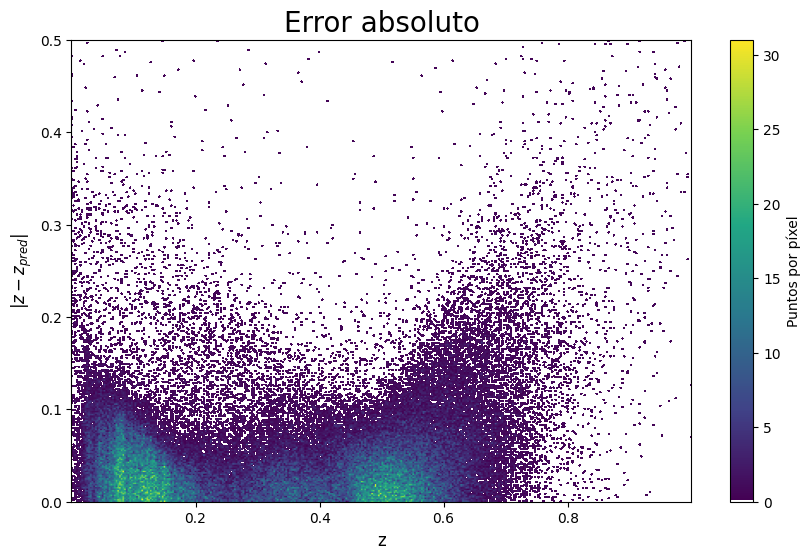

In [29]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Puntos por píxel')


fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, y_val, error_abs)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$|z-z_{pred}|$', fontsize=12)
plt.ylim(0,0.5)
plt.title("Error absoluto", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


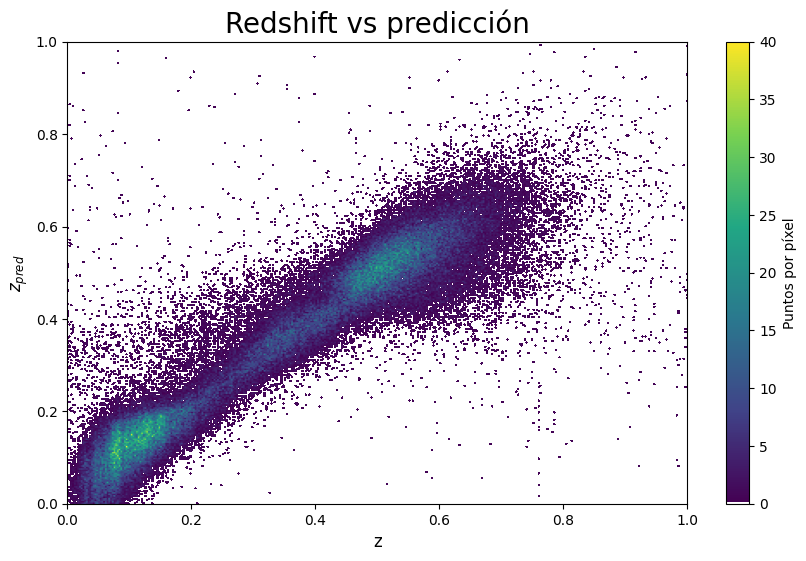

In [32]:
fig = plt.figure(figsize=(10, 6))
using_mpl_scatter_density(fig, y_val, pred_tot)
plt.xlabel("z", fontsize=12)
plt.ylabel(r'$z_{pred}$', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Redshift vs predicción", fontsize=20)
plt.show()